Introduction to Machine Learning

## Introduction

<div style="border-radius: 15px; border: 3px solid skyblue; padding: 15px;">
    
The task:
    
    - Mobile carrier Megaline has found out that many of their subscribers use legacy plans. They want to develop a model that would analyze subscribers' behavior and recommend one of Megaline's newer plans: Smart or Ultra. 

I have behavior data about subscribers who have already switched to the new plans. I will need to use classification to develop a model that will pick the right plan.

In [17]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

### Read data and Analyze

In [2]:
#read data and analyze
df = pd.read_csv('/datasets/users_behavior.csv')

#### Data Description

сalls — number of calls

minutes — total call duration in minutes

messages — number of text messages

mb_used — Internet traffic used in MB

is_ultra — plan for the current month (Ultra - 1, Smart - 0)

In [3]:
# check the dataframe for missing values or data types that need to be changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
#check for duplicates
df[df.duplicated()]

,calls,minutes,messages,mb_used,is_ultra


#### <span style="color:skyblue">Observations</span>
<div style="border-radius: 15px; border: 3px solid skyblue; padding: 15px;">
This dataset has been cleaned in another project and there are no missing values, incorrect data types, or duplicates. 
    
The data is ready to be used in a model.

### Split data into Training, Test, and Validation sets

<div style="border-radius: 15px; border: 3px solid skyblue; padding: 15px;">
    I'll be splitting the data into a 3:1:1 ratio. I want to leave a good size for the training set as it is already pretty small.

In [5]:
#the is_ultra field will be our target because we are trying to see if customers have the correct plan, with the rest being the features

features = df.drop(['is_ultra'],axis=1)
target = df['is_ultra']

In [6]:
#split data into training and test
features_train,features_test,target_train,target_test = train_test_split(features,target,
                                                                         test_size=0.25,
                                                                         random_state=12345)

#split the previously split data into training and validation sets
features_train,features_valid,target_train,target_valid = train_test_split(features_train,target_train,
                                                                           test_size=0.25,
                                                                           random_state=12345)

### Setup models to Compare

In [7]:
'''
To determine the optimal Decision Tree model, I will create a function that will test out different hyperparameters like 
max_depth, _min_samples_split and min_samples_leaf and return the Decision Tree model that has the best accuracy.

I will then compare the best Decision Tree model with the best models from the other two categories.

The ideal min_samples_split values are between 2-40 and the ideal min_samples_leaf values are between 1-20

'''


def best_decision_tree(features_train,features_test,target_train,target_test):
    best_model = None
    best_result = 0
    
    for depth in range(1,11):
        for split in range(2,41):
            for leaf in range(1,21):
                model = DecisionTreeClassifier(random_state=12345,
                                               max_depth=depth,
                                               min_samples_split=split,
                                               min_samples_leaf=leaf) # initiate the model to be tested
                model.fit(features_train,target_train) # train the model
                predictions = model.predict(features_test)
                result = accuracy_score(target_test,predictions) # grab the accuracy score for each model to be compared
                
                if result > best_result:
                    best_model = model
                    best_result = result
                    
    return best_model, best_result

In [8]:
#assign the model to a variable to be compared later
best_decision_tree = best_decision_tree(features_train,features_test,target_train,target_test)

In [9]:
'''
Similar to the Decision Tree model, I will create a function that will test out different hyperparameters like 
n_estimators, max_depth, _min_samples_split and min_samples_leaf and return the Random Forest model that has the best accuracy.

I will then compare the best Random Forest model with the best models from the other two categories.

'''

def best_random_forest(features_train,features_test,target_train,target_test):
    best_model = None
    best_result = 0
    
    for est in range(1,11):
        for depth in range(1,6):
            for split in range(2,21):
                for leaf in range(1,11):
                    model = RandomForestClassifier(random_state=12345,
                                                   n_estimators=est,
                                                   max_depth=depth,
                                                   min_samples_split=split,
                                                   min_samples_leaf=leaf)
                    model.fit(features_train,target_train) # train the model
                    predictions = model.predict(features_test)
                    result = accuracy_score(target_test,predictions) # grab the accuracy score for each model to be compared
                
                    if result > best_result:
                        best_model = model
                        best_result = result
                        
    return best_model, best_result

In [10]:
#assign the model to a variable to be compared later
best_random_forest = best_random_forest(features_train,features_test,target_train,target_test)

In [11]:
'''
I will create a function that will test out different hyperparameters like 
solvers and C values and return the Logistic Regression model that has the best accuracy.

I'm not including a penalty list in this because some values don't work with certain solvers.

I will then compare the best Logistic Regression model with the best models from the other two categories.

'''

def best_logistic_regression(features_train,features_test,target_train,target_test):
    best_model = None
    best_score = 0
    solver_list = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    c_list = [0.01,0.1,1,10,100]
    
    for c in c_list:
        for solver in solver_list:
            model = LogisticRegression(random_state=12345,solver=solver,penalty='l2',C=c)
            model.fit(features_train,target_train)   
            score_valid = model.score(features_test,target_test)  
                
            if score_valid > best_score:
                best_model = model
                best_score = score_valid
                    
    return best_model, best_score

In [12]:
#assign the model to a variable and display the models accuracies side by side and their optimal hyperparameters
best_logistic_regression = best_logistic_regression(features_train,features_valid,target_valid,target_test)

display(best_decision_tree) #The accuracy of the best Decision Tree model is 0.7978227060653188
display(best_random_forest) #The accuracy of the best Random Forest model is 0.80248833592535
display(best_logistic_regression) #The accuracy of the best Logistic Regression model is 0.7223300970873786

(DecisionTreeClassifier(max_depth=7, min_samples_leaf=11, random_state=12345),
 0.7978227060653188)

(RandomForestClassifier(max_depth=5, min_samples_split=14, n_estimators=1,
                        random_state=12345),
 0.80248833592535)

(LogisticRegression(C=0.01, random_state=12345, solver='newton-cg'),
 0.76049766718507)

#### <span style="color:skyblue">Findings</span>
<div style="border-radius: 15px; border: 3px solid skyblue; padding: 15px;">
    
    After finding the best model for Decision Tree, Random Forest, and Logistic Regression, it looks like although the Random Forest is the slowest to run, it is a little more accurate than the Decision Tree and should be used as the model for this task.
    
    The best Logistic Regression model did not cross our accuracy threshold of 0.75 and should not be considered over the other two models.

In [13]:
#split the model from it's accuracy value to use for quality check with validation set
model, valid_accuracy = best_random_forest
display(model)

RandomForestClassifier(max_depth=5, min_samples_split=14, n_estimators=1,
                       random_state=12345)

In [14]:
#train the random forest model and test it's accuracy against the validation set
model.fit(features_train,target_train)
predictions = model.predict(features_test)
test_accuracy = accuracy_score(predictions,target_test)

print('Accuracy of Random Forest Model against Validation data set:',test_accuracy)

Accuracy of Random Forest Model against Validation data set: 0.7669902912621359


#### <span style="color:skyblue">Observations</span>
<div style="border-radius: 15px; border: 3px solid skyblue; padding: 15px;">
    
The accuracy of the Random Forest model against the validation dataset is lower than our test dataset, but still above our 0.75 threshold.

### Sanity Check

In [15]:
'''
I will use a cross validation  check on the Random Forest Classifier for the sanity check. I will also visualize
the feature importance to see which features are most influential in making predictions.
'''

# Perform cross-validation to get average accuracy
cv_scores = cross_val_score(model, features_train, target_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.78398058 0.77615572 0.79805353 0.79075426 0.8053528 ]
Average Cross-Validation Accuracy: 0.7908593768454869


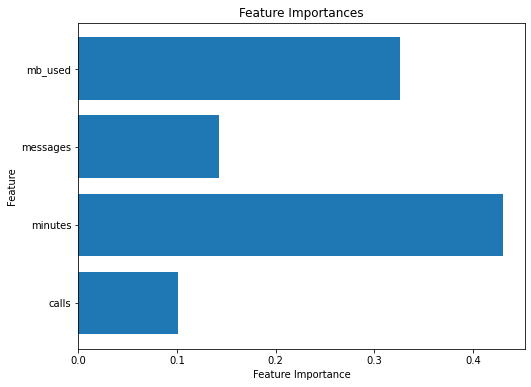

In [21]:
#Visualize feature importance to see which features are most influential in making predictions
plt.figure(figsize=(8, 6))
plt.barh(range(features.shape[1]), model.feature_importances_, align='center')
plt.yticks(range(features.shape[1]),features.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

#### <span style="color:skyblue">Observations</span>
<div style="border-radius: 15px; border: 3px solid skyblue; padding: 15px;">
    
Based on our findings, a cross-validation mean of 79% means that, on average, the model correctly predicts the target variable for 79% of the samples across different cross-validation folds.

While 79% is good and above our accuracy threshold, there is room for improvement in the model.

We also find that in terms of features, minutes and mb_used are the most important features and are most influential in making predictions.

Overall, an accuracy of 79% means that the model performs generally well on average.

## Conclusion

<div style="border-radius: 15px; border: 3px solid skyblue; padding: 15px;">
    
    - I tested 3 different classification models using the features, target, and validation datasets from the Megaline Mobile data.
    
    - While the Decision Tree and Random Forest models performed similarly, the Random Forest model slightly edged it out and the Logisitic Regression model did not come anywhere close in terms of accuracy.
    
    - I performed a sanity check on the Random Forest model and got a 79% average accuracy and found that the minutes and mb_used features are the most important and are most influential in making predictions for the model.